Shorts Selling / Short Positions (Part1)

In [2]:
t0 = 1.10
t1 = 1.25

Investor buys EUR 1 and pays USD 1.10. Then a day latter sells for USD 1.25

In [9]:
t1 / t0 - 1 # The EUR appreciates by 13.64% (incorrect way)

0.13636363636363624

In [11]:
t0 = 1 / 1.10 # inverse rate
t1 = 1 / 1.25

In [13]:
print(t0, t1) 

0.9090909090909091 0.8


Investor buys USD 1 and pays 0.9091 EUR. One day later he sells USD for 0.8 EUR.

In [16]:
t1 / t0 - 1 

-0.11999999999999988

When using simple returns, long position return != short position return * (-1)
-> use log returns

Shorts Selling / Short Positions (Part3)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [26]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC=USD,DJI,EURUSD=X,GC=F,MSFT
Date,,,,,,
2014-10-01 00:00:00+00:00,124.669998,NaN,16804.699219,1.262834,1214.599976,45.900002
2014-10-02 00:00:00+00:00,124.169998,NaN,16801.099609,1.262419,1214.199951,45.759998
2014-10-03 00:00:00+00:00,126.360001,NaN,17009.699219,1.267058,1192.199951,46.090000
2014-10-06 00:00:00+00:00,126.260002,NaN,16991.900391,1.251361,1206.699951,46.090000
2014-10-07 00:00:00+00:00,123.320000,NaN,16719.400391,1.264606,1211.699951,45.529999
...,...,...,...,...,...,...
2021-05-24 00:00:00+00:00,237.440002,NaN,34394.000000,1.218324,1884.599976,250.779999
2021-05-25 00:00:00+00:00,240.740005,NaN,34312.500000,1.221464,1898.099976,251.720001
2021-05-26 00:00:00+00:00,241.369995,NaN,34323.101562,1.224909,1901.300049,251.490005


In [36]:
close["USDEUR=X"] = 1/close["EURUSD=X"]

In [38]:
print(close.columns)

Index(['BA', 'BTC=USD', 'DJI', 'EURUSD=X', 'GC=F', 'MSFT', 'USDEUR=X'], dtype='object')


In [40]:
close

,BA,BTC=USD,DJI,EURUSD=X,GC=F,MSFT,USDEUR=X
Date,,,,,,,
2014-10-01 00:00:00+00:00,124.669998,NaN,16804.699219,1.262834,1214.599976,45.900002,0.791870
2014-10-02 00:00:00+00:00,124.169998,NaN,16801.099609,1.262419,1214.199951,45.759998,0.792130
2014-10-03 00:00:00+00:00,126.360001,NaN,17009.699219,1.267058,1192.199951,46.090000,0.789230
2014-10-06 00:00:00+00:00,126.260002,NaN,16991.900391,1.251361,1206.699951,46.090000,0.799130
2014-10-07 00:00:00+00:00,123.320000,NaN,16719.400391,1.264606,1211.699951,45.529999,0.790760
...,...,...,...,...,...,...,...
2021-05-24 00:00:00+00:00,237.440002,NaN,34394.000000,1.218324,1884.599976,250.779999,0.820800
2021-05-25 00:00:00+00:00,240.740005,NaN,34312.500000,1.221464,1898.099976,251.720001,0.818690
2021-05-26 00:00:00+00:00,241.369995,NaN,34323.101562,1.224909,1901.300049,251.490005,0.816387


In [42]:
fx = close[["EURUSD=X", "USDEUR=X"]].dropna().copy()

In [44]:
fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01 00:00:00+00:00,1.262834,0.791870
2014-10-02 00:00:00+00:00,1.262419,0.792130
2014-10-03 00:00:00+00:00,1.267058,0.789230
2014-10-06 00:00:00+00:00,1.251361,0.799130
2014-10-07 00:00:00+00:00,1.264606,0.790760
...,...,...
2021-05-24 00:00:00+00:00,1.218324,0.820800
2021-05-25 00:00:00+00:00,1.221464,0.818690
2021-05-26 00:00:00+00:00,1.224909,0.816387


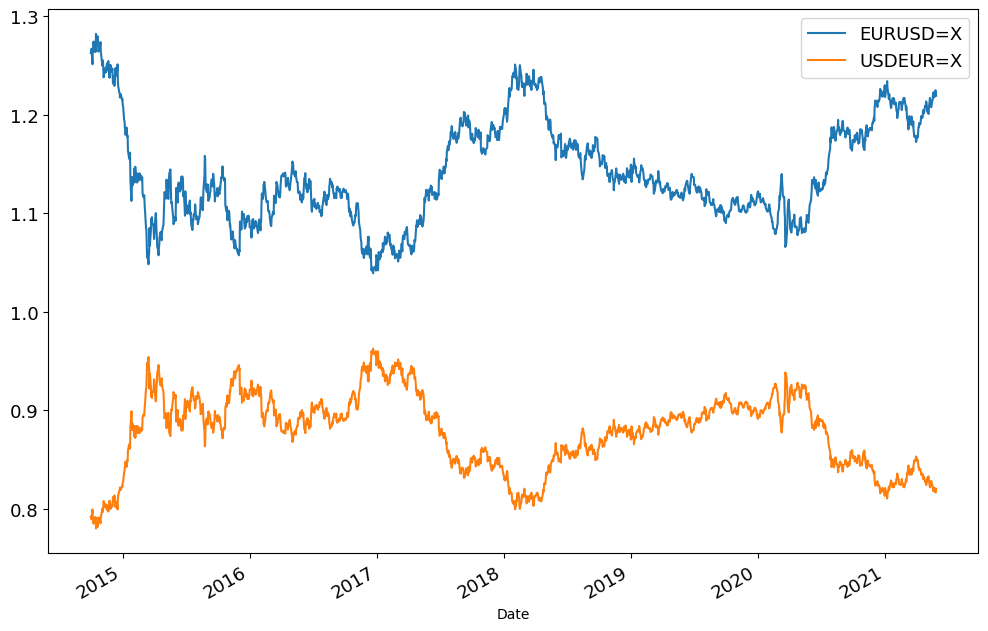

In [46]:
fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [48]:
simple_ret = fx.pct_change()
simple_ret

,EURUSD=X,USDEUR=X
Date,,
2014-10-01 00:00:00+00:00,NaN,NaN
2014-10-02 00:00:00+00:00,-0.000328,0.000328
2014-10-03 00:00:00+00:00,0.003674,-0.003661
2014-10-06 00:00:00+00:00,-0.012389,0.012544
2014-10-07 00:00:00+00:00,0.010585,-0.010474
...,...,...
2021-05-24 00:00:00+00:00,-0.003448,0.003460
2021-05-25 00:00:00+00:00,0.002577,-0.002571
2021-05-26 00:00:00+00:00,0.002821,-0.002813


In [52]:
simple_ret.add(1).prod() #- 1 # compound simple returns

EURUSD=X   0.965542
USDEUR=X   1.035688
dtype: float64

For simple returns, long position != short positions returns

In [55]:
log_ret = np.log(fx / fx.shift())
log_ret

,EURUSD=X,USDEUR=X
Date,,
2014-10-01 00:00:00+00:00,NaN,NaN
2014-10-02 00:00:00+00:00,-0.000328,0.000328
2014-10-03 00:00:00+00:00,0.003668,-0.003668
2014-10-06 00:00:00+00:00,-0.012466,0.012466
2014-10-07 00:00:00+00:00,0.010529,-0.010529
...,...,...
2021-05-24 00:00:00+00:00,-0.003454,0.003454
2021-05-25 00:00:00+00:00,0.002574,-0.002574
2021-05-26 00:00:00+00:00,0.002817,-0.002817


In [59]:
log_ret.sum() # cumulative (The outcome is correct now)

EURUSD=X   -0.035066
USDEUR=X    0.035066
dtype: float64

In [61]:
norm_fx = log_ret.cumsum().apply(np.exp) # normalized prices (Base 1)
norm_fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01 00:00:00+00:00,NaN,NaN
2014-10-02 00:00:00+00:00,0.999672,1.000328
2014-10-03 00:00:00+00:00,1.003345,0.996666
2014-10-06 00:00:00+00:00,0.990915,1.009168
2014-10-07 00:00:00+00:00,1.001404,0.998598
...,...,...
2021-05-24 00:00:00+00:00,0.964754,1.036534
2021-05-25 00:00:00+00:00,0.967240,1.033869
2021-05-26 00:00:00+00:00,0.969969,1.030961


In [65]:
norm_fx.iloc[0] = [1, 1]
norm_fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01 00:00:00+00:00,1.000000,1.000000
2014-10-02 00:00:00+00:00,0.999672,1.000328
2014-10-03 00:00:00+00:00,1.003345,0.996666
2014-10-06 00:00:00+00:00,0.990915,1.009168
2014-10-07 00:00:00+00:00,1.001404,0.998598
...,...,...
2021-05-24 00:00:00+00:00,0.964754,1.036534
2021-05-25 00:00:00+00:00,0.967240,1.033869
2021-05-26 00:00:00+00:00,0.969969,1.030961


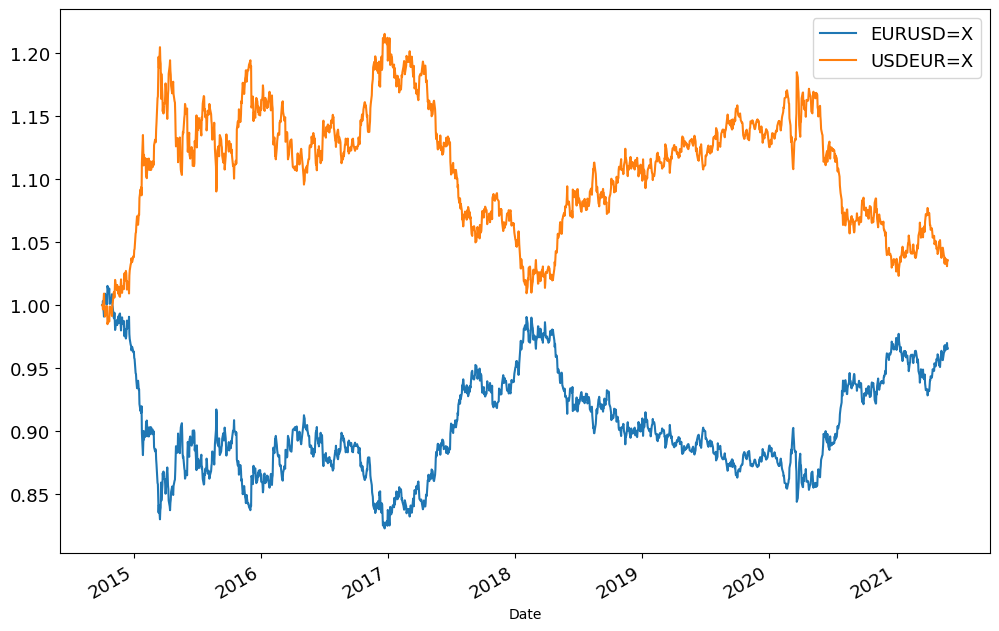

In [67]:
norm_fx.plot(figsize = (12, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

Covariance and Correlation

Correlation between instruments/assets play an important role in portfolio managment.

In [71]:
pd.options.display.float_format = '{:.4f}'.format

In [73]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC=USD,DJI,EURUSD=X,GC=F,MSFT
Date,,,,,,
2014-10-01 00:00:00+00:00,124.6700,NaN,16804.6992,1.2628,1214.6000,45.9000
2014-10-02 00:00:00+00:00,124.1700,NaN,16801.0996,1.2624,1214.2000,45.7600
2014-10-03 00:00:00+00:00,126.3600,NaN,17009.6992,1.2671,1192.2000,46.0900
2014-10-06 00:00:00+00:00,126.2600,NaN,16991.9004,1.2514,1206.7000,46.0900
2014-10-07 00:00:00+00:00,123.3200,NaN,16719.4004,1.2646,1211.7000,45.5300
...,...,...,...,...,...,...
2021-05-24 00:00:00+00:00,237.4400,NaN,34394.0000,1.2183,1884.6000,250.7800
2021-05-25 00:00:00+00:00,240.7400,NaN,34312.5000,1.2215,1898.1000,251.7200
2021-05-26 00:00:00+00:00,241.3700,NaN,34323.1016,1.2249,1901.3000,251.4900


In [75]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

,BA,BTC=USD,DJI,EURUSD=X,GC=F,MSFT,USDEUR=X
Date,,,,,,,
2014-10-01 00:00:00+00:00,124.6700,NaN,16804.6992,1.2628,1214.6000,45.9000,0.7919
2014-10-02 00:00:00+00:00,124.1700,NaN,16801.0996,1.2624,1214.2000,45.7600,0.7921
2014-10-03 00:00:00+00:00,126.3600,NaN,17009.6992,1.2671,1192.2000,46.0900,0.7892
2014-10-06 00:00:00+00:00,126.2600,NaN,16991.9004,1.2514,1206.7000,46.0900,0.7991
2014-10-07 00:00:00+00:00,123.3200,NaN,16719.4004,1.2646,1211.7000,45.5300,0.7908
...,...,...,...,...,...,...,...
2021-05-24 00:00:00+00:00,237.4400,NaN,34394.0000,1.2183,1884.6000,250.7800,0.8208
2021-05-25 00:00:00+00:00,240.7400,NaN,34312.5000,1.2215,1898.1000,251.7200,0.8187
2021-05-26 00:00:00+00:00,241.3700,NaN,34323.1016,1.2249,1901.3000,251.4900,0.8164


In [77]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC=USD,DJI,EURUSD=X,GC=F,MSFT,USDEUR=X
Date,,,,,,,
2014-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02 00:00:00+00:00,-0.0040,NaN,-0.0002,-0.0003,-0.0003,-0.0031,0.0003
2014-10-03 00:00:00+00:00,0.0175,NaN,0.0123,0.0037,-0.0183,0.0072,-0.0037
2014-10-06 00:00:00+00:00,-0.0008,NaN,-0.0010,-0.0125,0.0121,0.0000,0.0125
2014-10-07 00:00:00+00:00,-0.0236,NaN,-0.0162,0.0105,0.0041,-0.0122,-0.0105
...,...,...,...,...,...,...,...
2021-05-24 00:00:00+00:00,0.0111,NaN,0.0054,-0.0035,0.0042,0.0226,0.0035
2021-05-25 00:00:00+00:00,0.0138,NaN,-0.0024,0.0026,0.0071,0.0037,-0.0026
2021-05-26 00:00:00+00:00,0.0026,NaN,0.0003,0.0028,0.0017,-0.0009,-0.0028


In [79]:
returns.cov()

,BA,BTC=USD,DJI,EURUSD=X,GC=F,MSFT,USDEUR=X
BA,0.0007,NaN,0.0002,0.0000,0.0000,0.0002,-0.0000
BTC=USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DJI,0.0002,NaN,0.0002,0.0000,0.0000,0.0002,-0.0000
EURUSD=X,0.0000,NaN,0.0000,0.0000,0.0000,-0.0000,-0.0000
GC=F,0.0000,NaN,0.0000,0.0000,0.0001,-0.0000,-0.0000
MSFT,0.0002,NaN,0.0002,-0.0000,-0.0000,0.0003,0.0000
USDEUR=X,-0.0000,NaN,-0.0000,-0.0000,-0.0000,0.0000,0.0000


In [81]:
returns.corr()

,BA,BTC=USD,DJI,EURUSD=X,GC=F,MSFT,USDEUR=X
BA,1.0000,NaN,0.7197,0.0347,0.0048,0.4221,-0.0347
BTC=USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DJI,0.7197,NaN,1.0000,0.0203,0.0157,0.7157,-0.0203
EURUSD=X,0.0347,NaN,0.0203,1.0000,0.0565,-0.0191,-1.0000
GC=F,0.0048,NaN,0.0157,0.0565,1.0000,-0.0008,-0.0565
MSFT,0.4221,NaN,0.7157,-0.0191,-0.0008,1.0000,0.0191
USDEUR=X,-0.0347,NaN,-0.0203,-1.0000,-0.0565,0.0191,1.0000


In [83]:
import seaborn as sns

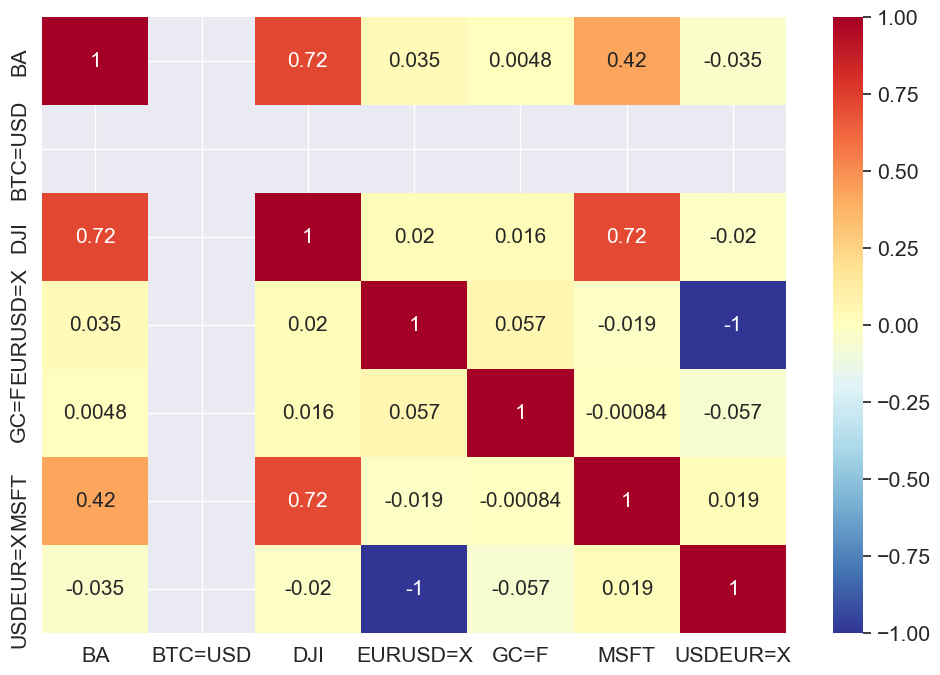

In [89]:
plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin = -1, vmax = 1)
plt.show()